# Лабораторная работа №9
## Бинарные изображения, основные характеристики бинарных изображений
## Задание 3.1.
Вычислить площадь s, периметр р, ширину w, высоту h, отношение ширины к высоте w/h, отношение площади изображения к площади описывающего прямоугольника s/(wh), эквивалентный диаметр, центр масс, моменты бинарного изображения.

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 899.5, 709.5, -0.5)

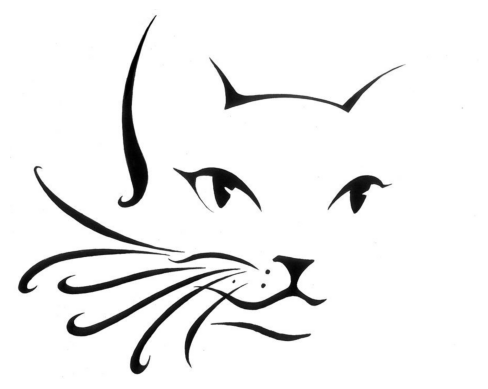

In [5]:
img = cv2.imread('cat.jpg',0)
imag = cv2.imread('cat.jpg',0)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

(-0.5, 899.5, 709.5, -0.5)

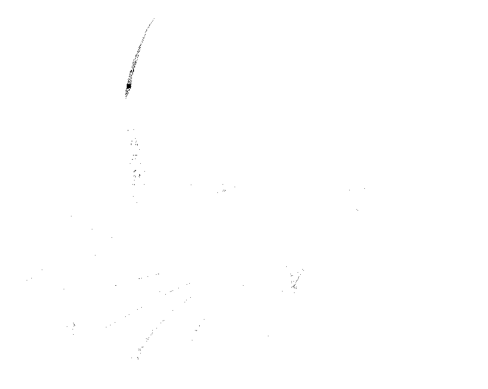

In [6]:
ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.axis("off")

In [7]:
# Создание контура
cnt = contours[0]
# Вычисление площади
s = cv2.contourArea(cnt)
# Вычисление периметра
p = cv2.arcLength(cnt, True)
# Вычисление моментов
M = cv2.moments(cnt)
x, y, w, h = cv2.boundingRect(cnt)

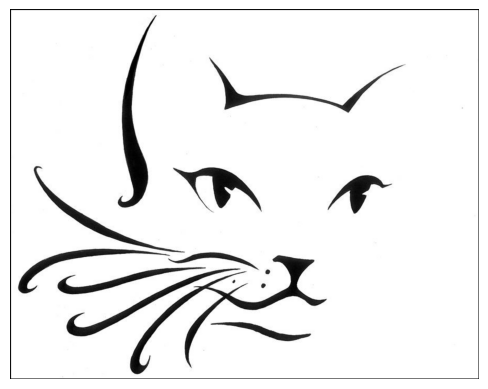

In [8]:
imag = cv2.rectangle(imag, (x, y), (x+w, y+h), (0, 255, 0), 2) #Рамка

plt.imshow(cv2.cvtColor(imag, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [19]:
asprat_ratio = float(w) / h # соотношение сторон
rectar = w * h
s_ratio = float(asprat_ratio) / rectar
eqdiam = np.sqrt(4*asprat_ratio / np.pi)

In [20]:
print("Площадь s: ", s)
print("Периметр p: ", p)
print("Моменты M: ", M)
print("x, y, w, h: ", x, y, w, h)
print(f"Ширина w: {w}, Высота h: {h}")
print(f"Отношение ширины к высоте w/h: {asprat_ratio}")
print("Отношение s/(wh): ", s_ratio)
print("Эквивалентный диаметр: ", eqdiam)

Площадь s:  637391.0
Периметр p:  3216.0
Моменты M:  {'m00': 637391.0, 'm10': 286507254.5, 'm01': 225955109.5, 'm20': 171713347863.66666, 'm11': 101566821720.25, 'm02': 106801448423.66666, 'm30': 115777724797077.25, 'm21': 60872381817669.836, 'm12': 48007251066438.164, 'm03': 56791670199284.75, 'mu20': 42928336965.91666, 'mu11': 0.0, 'mu02': 26700362105.916656, 'mu30': 0.015625, 'mu21': 0.005859375, 'mu12': 0.001953125, 'mu03': 0.0078125, 'nu20': 0.1056652562294311, 'nu11': 0.0, 'nu02': 0.06572117167222838, 'nu30': 4.8173168118952455e-17, 'nu21': 1.806493804460717e-17, 'nu12': 6.021646014869057e-18, 'nu03': 2.4086584059476228e-17}
x, y, w, h:  0 0 900 710
Ширина w: 900, Высота h: 710
Отношение ширины к высоте w/h: 1.267605633802817
Отношение s/(wh):  1.9837333862328904e-06
Эквивалентный диаметр:  1.2704194661948573


## Задание 3.2.
Используя изображение маски определить крайние точки, минимальное и максимальное значения и их координаты для бинарного изображения. Найти среднюю интенсивность изображения в градациях серого, ориентацию бинарного изображения с выделенной осью.

In [21]:
img = cv2.imread('cat.jpg', 0)

ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
cnt = contours[0]

(-0.5, 899.5, 709.5, -0.5)

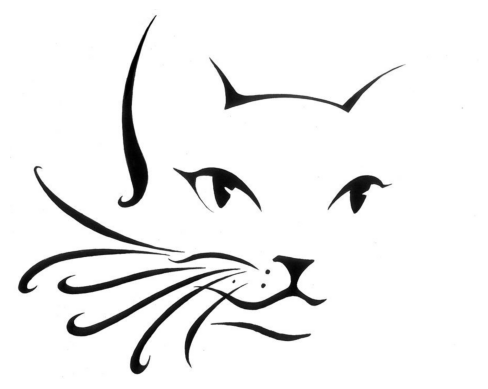

In [22]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

In [23]:
mask = np.zeros(img.shape, np.uint8)

cv2.drawContours(mask, [cnt], 0, 255, -1)
pixpoin = np.transpose(np.nonzero(mask))
minv, maxv, minl, maxl = cv2.minMaxLoc(img, mask=mask)

In [24]:
# Крайние точки
leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])

In [25]:
(x,y),(MA,ma),ang=cv2.fitEllipse(cnt)
meanv = cv2.mean(img,mask = mask)

In [26]:
print(f"Пиксельные точки:\n {pixpoin}")
print(f"Максимальное и минимальное значения и их координаты: {minv}, {maxv}, {minl}, {maxl}")
print(f"Крайние точки: {leftmost}, {rightmost}, {topmost}, {bottommost}")
print(f"Средняя интенсивность: {meanv}")
print(f"Ориентация: {ang}")

Пиксельные точки:
 [[  0   0]
 [  0   1]
 [  0   2]
 ...
 [709 897]
 [709 898]
 [709 899]]
Максимальное и минимальное значения и их координаты: 0.0, 255.0, (276, 18), (0, 0)
Крайние точки: (0, 0), (899, 0), (0, 0), (899, 709)
Средняя интенсивность: (237.9499640062598, 0.0, 0.0, 0.0)
Ориентация: 0.0
